# Potential Energy Curve of Nitrogen Molecule - sto-3g basis set

In [5]:
from pyscf import fci
from pyscf import mrpt
from pyscf import gto, cc, mcscf
from pyscf.mcscf import avas

#Lists to store the values from different classical computational chemistry methods
energy_hf=[]
energy_ccsd=[]
energy_cas_NO=[]
energy_cas=[]
energy_cas_pt=[]
energy_fci=[]

#Loop running through various interatomic distances
for i in [0.7,0.8,0.9,1.0,1.113,1.2,1.4,1.6,2.0,2.5]:
  #Defining the molecule
  mol = gto.M(
    atom = 'N 0 0 0; N 0 0 '+str(i),
    basis = 'sto-3g',
    spin = 0)
  
  #Restricted Hartree-Fock calculation
  myhf = mol.RHF().run()
  energy_hf.append(myhf.e_tot)
    
  #Full-Configuration Interaction Calculation
  fci_ans = fci.FCI(myhf).run()
  energy_fci.append(fci_ans.e_tot)

  #CCSD Calculation
  mymp = cc.CCSD(myhf).run()
  energy_ccsd.append(mymp.e_tot)
    
  #Natural orbitals (NO) ( which are eigenvectors of 1RDMs) from CCSD calculation
  noons, natorbs = mcscf.addons.make_natural_orbitals(mymp)
  ncas, nelecas = (6,6)

  #CASCI with NO based active space
  mycas_no = mcscf.CASCI(myhf, ncas, nelecas)
  mycas_no.kernel(natorbs)
    
  #AVAS - Atomic Valence Active Space Selection
  #Atomic projectors
  ao_labels = ['N 2s','N 2p']
  norb, ne_act, orbs = avas.avas(myhf, ao_labels, canonicalize=False)
    
  #CASSCF with active space selected by AVAS
  mycas_SCF = mcscf.CASSCF(myhf,norb,ne_act)
  mycas_SCF.kernel(orbs)

  #Dynamic correlation contributions from NEVPT2
  ci_nevpt_e1 = mrpt.NEVPT(mycas_SCF, root=0).kernel()

  energy_cas.append(mycas_SCF.e_tot)
  energy_cas_pt.append(mycas_SCF.e_tot + ci_nevpt_e1)
  energy_cas_NO.append(mycas_no.e_tot)

converged SCF energy = -105.697412212736
E(CCSD) = -105.7642384825767  E_corr = -0.06682626984048216
CASCI E = -105.745742412625  E(CI) = -13.7795187128109  S^2 = 0.0000000
CASSCF energy = -105.764907889947
CASCI E = -105.764907889947  E(CI) = -86.2614406682795  S^2 = 0.0000000
Sr    (-1)',   E = -0.00000000000000
Si    (+1)',   E = -0.00004110428138
Sijrs (0)  ,   E = 0.00000000000000
Sijr  (+1) ,   E = -0.00000000000000
Srsi  (-1) ,   E = -0.00000000000000
Srs   (-2) ,   E = 0.00000000000000
Sij   (+2) ,   E = -0.00003114836718
Sir   (0)' ,   E = -0.00000000000000
Nevpt2 Energy = -0.000072252648560
converged SCF energy = -106.680802456647
E(CCSD) = -106.7651747516662  E_corr = -0.08437229501965181
CASCI E = -106.740636954102  E(CI) = -13.0874198190729  S^2 = 0.0000000
CASSCF energy = -106.766237080376
CASCI E = -106.766237080376  E(CI) = -85.1101529083000  S^2 = 0.0000000
Sr    (-1)',   E = -0.00000000000000
Si    (+1)',   E = -0.00002465528554
Sijrs (0)  ,   E = 0.00000000000000
Sij

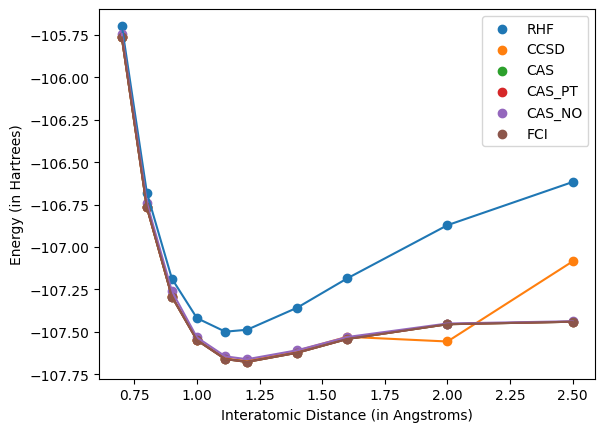

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
#Interatomic Distance
a=[0.7,0.8,0.9,1.0,1.113,1.2,1.4,1.6,2.0,2.5]

#Plots from various methods
plt.scatter(a,energy_hf,label='RHF')
plt.plot(a,energy_hf)
plt.scatter(a,energy_ccsd,label='CCSD')
plt.plot(a,energy_ccsd)
plt.scatter(a,energy_cas,label='CAS')
plt.plot(a,energy_cas)
plt.scatter(a,energy_cas_pt,label='CAS_PT')
plt.plot(a,energy_cas_pt)
plt.scatter(a,energy_cas_NO,label='CAS_NO')
plt.plot(a,energy_cas_NO)
plt.scatter(a,energy_fci,label='FCI')
plt.plot(a,energy_fci)
plt.legend()
plt.xlabel('Interatomic Distance (in Angstroms)')
plt.ylabel('Energy (in Hartrees)')
plt.show()